In [1]:
# import ParentImport
import datasets
import torchvision.transforms as transforms
import face_recognition
import pandas as pd
import torch

from tqdm.auto import tqdm
from matplotlib.pyplot import imshow
# from trainer import Trainer

In [2]:
dataset = datasets.Dataset(basedir='datasets')
dataset.all_videos

TRAIN SIZE 6248
TEXT SIZE 695


0       9a22372d22a52397.mp4
1       9bc4f1306bb8e2cd.mp4
2       88fe2a902a9d8cc7.mp4
3       1f3cbda142d0944a.mp4
4       63bed62257daccaf.mp4
                ...         
6938    f5c4bfb20068f129.mp4
6939    b7b7b7f6db7f6e2e.mp4
6940    c3fc75289ae3b41e.mp4
6941    519e97d4c90aaa1c.mp4
6942    38cd7b295a5cfda5.mp4
Name: filename, Length: 6943, dtype: object

In [3]:
dataframe = pd.DataFrame(columns=['filename', 'max_faces'])
print(dataframe.head())

Empty DataFrame
Columns: [filename, max_faces]
Index: []


In [4]:
print(len(dataset.train_videos), dataset.train_videos[:5])
print(len(dataset.test_videos), dataset.test_videos[:5])
vidobj = dataset.read_video('9bc513e4e366b7d8.mp4', every_n_frames=20, rescale=0.1)

6248 ['9bc513e4e366b7d8.mp4' '19ae26f7f3db51fa.mp4' '26ec4ef1a1899c3f.mp4'
 '87060023c00b28c4.mp4' 'ed3660460cb08780.mp4']
695 ['fb1d15ce0eb1e68c.mp4' '8f7ecc23e031b829.mp4' '05f01e4183c6d94b.mp4'
 'a9e6dcab69d29b90.mp4' '525b5d9ca25afeb6.mp4']


(192, 108, 3)
[(39, 66, 101, 4)]
(62, 62, 3)


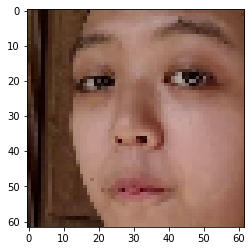

In [5]:
image = vidobj.out_video[9]
print(image.shape)
face_locations = face_recognition.face_locations(image)
print(face_locations)
loc1 = face_locations[0]

top, right, bottom, left = loc1
# print(image)
crop_image = image[top:bottom, left:right]
print(crop_image.shape)
%matplotlib inline
imshow(crop_image)

In [6]:
max_face_mapping = {}
length = 100 # len(dataset.all_videos)

for k in tqdm(range(length)):
    filename = dataset.all_videos[k]
    # print(k, filename)
    try:
        vidobj = dataset.read_video(filename, every_n_frames=20, rescale=0.1)
    except ValueError as e:
        print('FAILED TO READ', k, filename)
        continue

    np_frames = vidobj.out_video
    num_frames = len(np_frames)
    detections = 0
    max_faces = 0
    
    for i in range(len(np_frames)):
        image = np_frames[i]
        face_locations = face_recognition.face_locations(image)
        faces = len(face_locations)
        max_faces = max(max_faces, faces)
        
        if faces > 0:
            detections += 1
    
    p_detection = detections / num_frames
    max_face_mapping[filename] = (max_faces, p_detection)
    print('READ', k, filename, max_faces, p_detection)


  0%|          | 0/100 [00:00<?, ?it/s]

READ 0 9a22372d22a52397.mp4 1 0.8823529411764706
READ 1 9bc4f1306bb8e2cd.mp4 1 0.8235294117647058
READ 2 88fe2a902a9d8cc7.mp4 1 0.9411764705882353
READ 3 1f3cbda142d0944a.mp4 1 0.8823529411764706
READ 4 63bed62257daccaf.mp4 1 1.0
READ 5 ee8e8d4a59a95d5f.mp4 1 1.0
READ 6 04011d0f6efa6d85.mp4 1 1.0
READ 7 cbcf9320b4e4d9f9.mp4 1 1.0
READ 8 262a25215787616d.mp4 0 0.0
READ 9 fbca2df503111454.mp4 0 0.0
READ 10 9149e78016d11aeb.mp4 0 0.0
READ 11 eacc6b7d3bdb8b39.mp4 0 0.0
READ 12 026646a4eb385e50.mp4 0 0.0
READ 13 8d2db652940a8dc8.mp4 0 0.0
READ 14 baf6dcb6e2196efa.mp4 0 0.0
READ 15 2c33dc22e961f0d7.mp4 1 1.0
READ 16 e4ed78bc2aa92b40.mp4 0 0.0
READ 17 77fb2d049f234fbd.mp4 1 1.0
READ 18 5fb85b52c7d4d045.mp4 1 1.0
READ 19 c0ed568e0489acd1.mp4 1 1.0
READ 20 1ddf59260ed2749f.mp4 1 0.23529411764705882
READ 21 f1bcde07aba6649e.mp4 1 0.29411764705882354
READ 22 975ff2ad09647e57.mp4 0 0.0
READ 23 bfe0f53abccde244.mp4 1 0.11764705882352941
READ 24 386b9e08d7f2baf4.mp4 0 0.0
READ 25 3b045995aee69601.mp

In [13]:
import json

with open('face_map_stats.json', 'w') as fp:
    json.dump(max_face_mapping, fp, indent=4)

In [8]:
dataset.read_video('a161b256a9dcd783.mp4', every_n_frames=10, rescale=0.1)

[mov,mp4,m4a,3gp,3g2,mj2 @ 0xde024c0] moov atom not found
/home/milselarch/projects/AISG/loader.py:61: RuntimeWarning: divide by zero encountered in true_divide
  rescale = rescale * 1920. / np.max((width_in, height_in))
/home/milselarch/projects/AISG/loader.py:63: RuntimeWarning: invalid value encountered in double_scalars
  width_out = int(width_in * rescale) if rescale else width_in


ValueError: cannot convert float NaN to integer